In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bootcampviztools as bt

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

In [12]:
df = pd.read_csv("./data/credit_npo.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


*Tirando de herramientas chatteras:*

1. **SeriousDlqin2yrs**: Variable dependiente/binaria. Indica si el individuo experimentó morosidad de 90 días o más en los próximos dos años al momento de la toma de datos. Un valor de 1 indica que sí experimentó dificultades financieras serias, y 0 en caso contrario.

2. **RevolvingUtilizationOfUnsecuredLines**: Proporción del crédito utilizado por el consumidor en relación con todas sus líneas de crédito disponibles sin garantía (como tarjetas de crédito).

3. **age**: Edad del prestatario en años.

4. **NumberOfTime30-59DaysPastDueNotWorse**: Número de veces que el prestatario ha estado retrasado entre 30 y 59 días en sus pagos, pero no peor en los últimos 2 años.

5. **DebtRatio**: Relación deuda/ingreso. Es una medida de la carga de deuda del prestatario, calculada como sus pagos mensuales de deuda divididos por su ingreso mensual.

6. **MonthlyIncome**: Ingreso mensual del prestatario.

7. **NumberOfOpenCreditLinesAndLoans**: Número de préstamos abiertos y líneas de crédito (como préstamos para automóviles, hipotecas, préstamos personales, etc.).

8. **NumberOfTimes90DaysLate**: Número de veces que el prestatario ha estado retrasado más de 90 días en sus pagos.

9. **NumberRealEstateLoansOrLines**: Número de préstamos o líneas de crédito inmobiliarios, incluyendo hipotecas y líneas de crédito con garantía hipotecaria.

10. **NumberOfTime60-89DaysPastDueNotWorse**: Número de veces que el prestatario ha estado retrasado entre 60 y 89 días en sus pagos, pero no peor en los últimos 2 años.

11. **NumberOfDependents**: Número de dependientes que el prestatario tiene en su familia, excluyéndose a sí mismo.



In [13]:
target = "SeriousDlqin2yrs"

In [ ]:
bt.pinta_distribucion_categoricas(df,[target], mostrar_valores= True)

In [14]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [15]:
ndp = "NumberOfDependents"
mi = "MonthlyIncome"

In [16]:
moda_train = train_set[ndp].mode()
print(moda_train)

0    0.0
Name: NumberOfDependents, dtype: float64


In [17]:
moda_train = moda_train[0]
train_set[ndp] = train_set[ndp].fillna(moda_train)
test_set[ndp] = test_set[ndp].fillna(moda_train)

In [ ]:
bt.plot_combined_graphs(train_set, columns=[mi], bins = 50)

In [18]:
mediana = train_set[mi].quantile(0.5)
train_set[mi] = train_set[mi].fillna(mediana)
test_set[mi] = test_set[mi].fillna(mediana)

# Mini EDA

In [ ]:
bt.plot_categorical_relationship_fin(train_set, target, ndp, show_values= True, relative_freq= True)

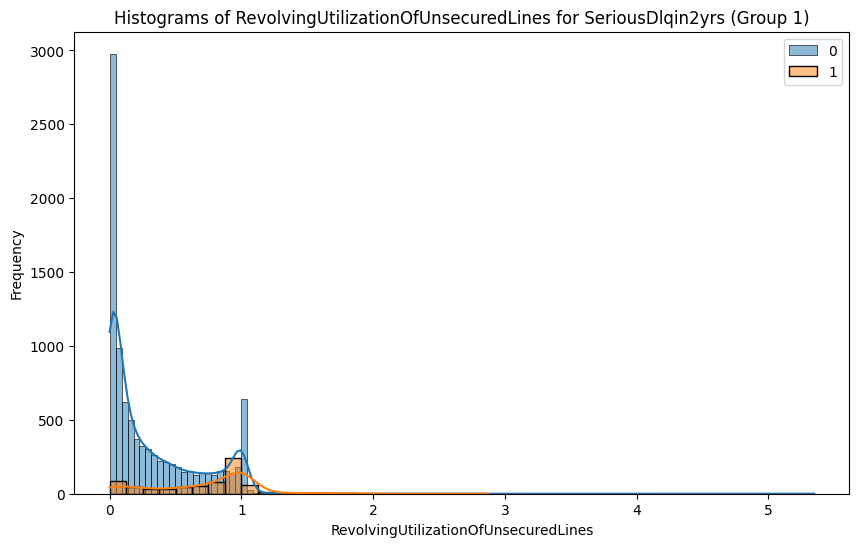

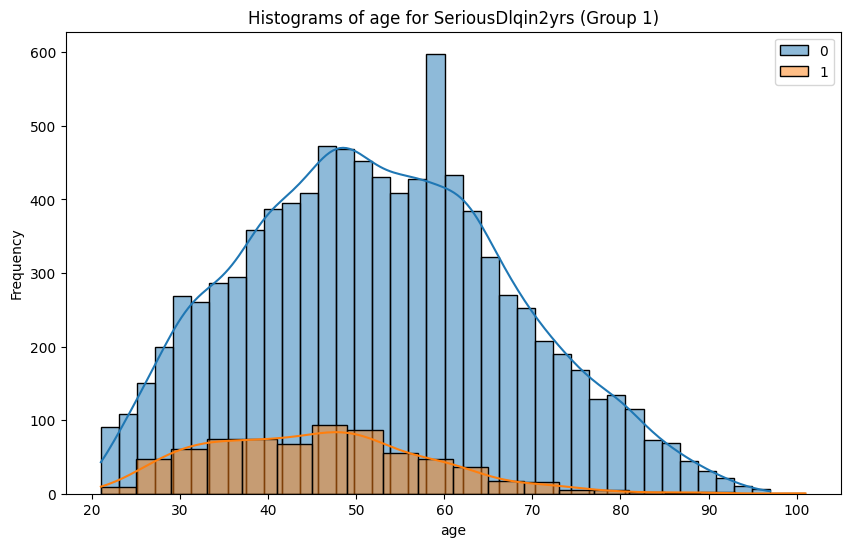

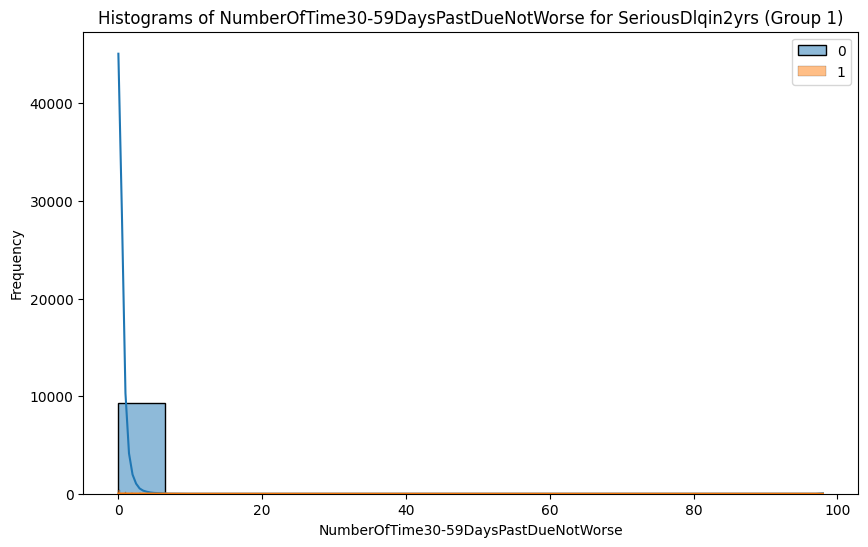

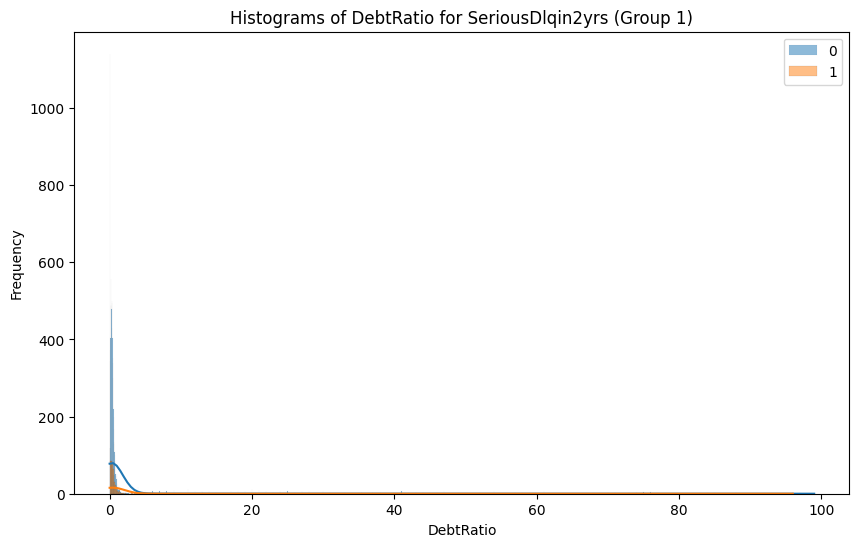

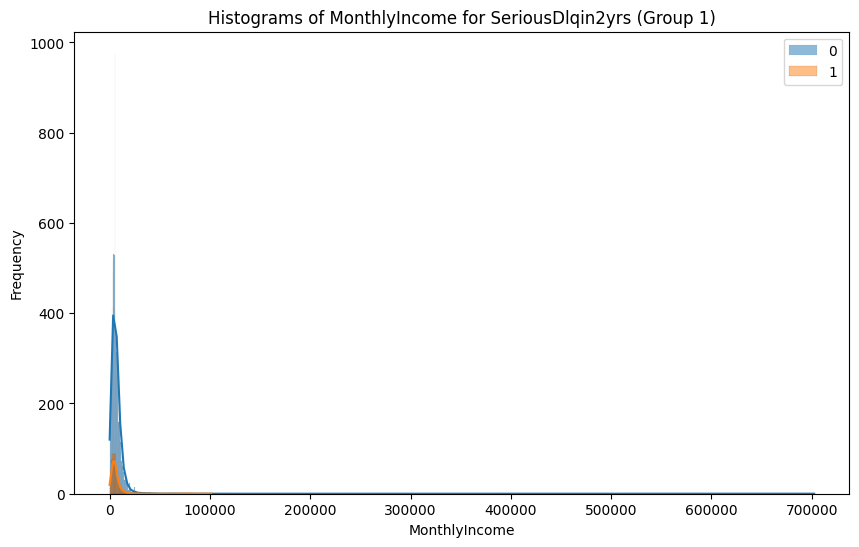

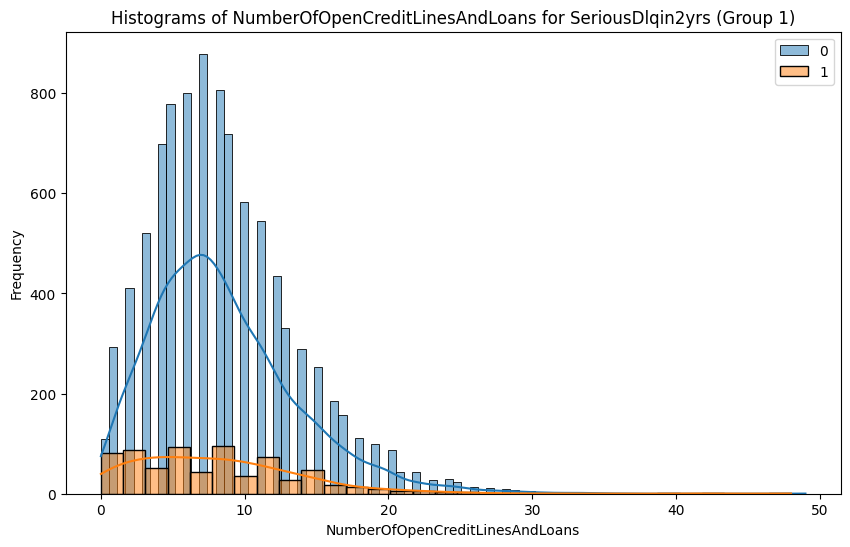

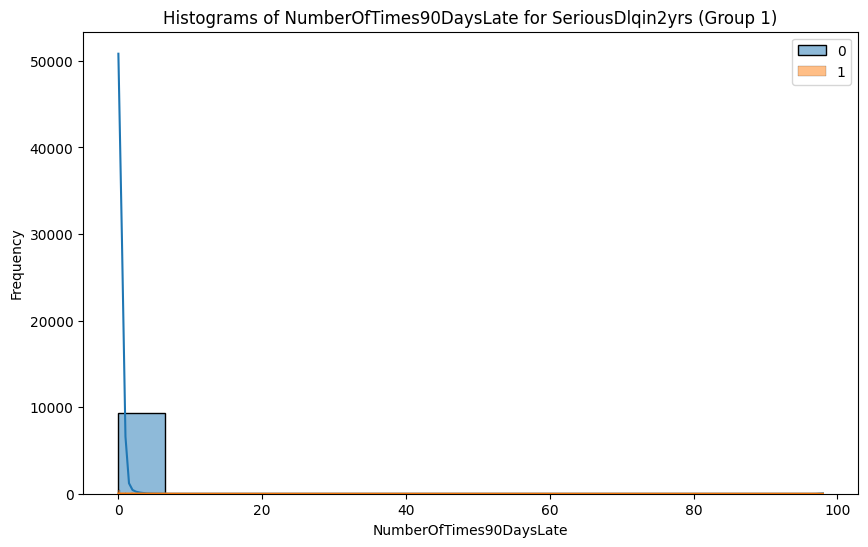

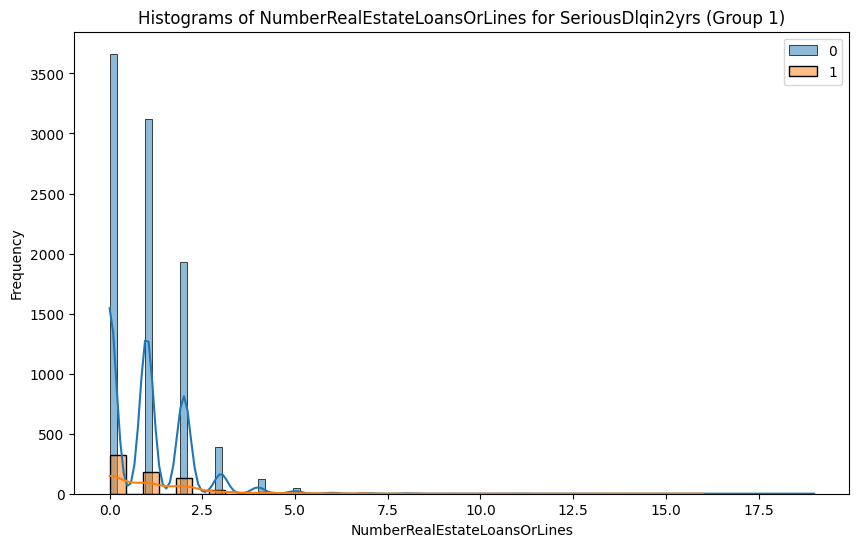

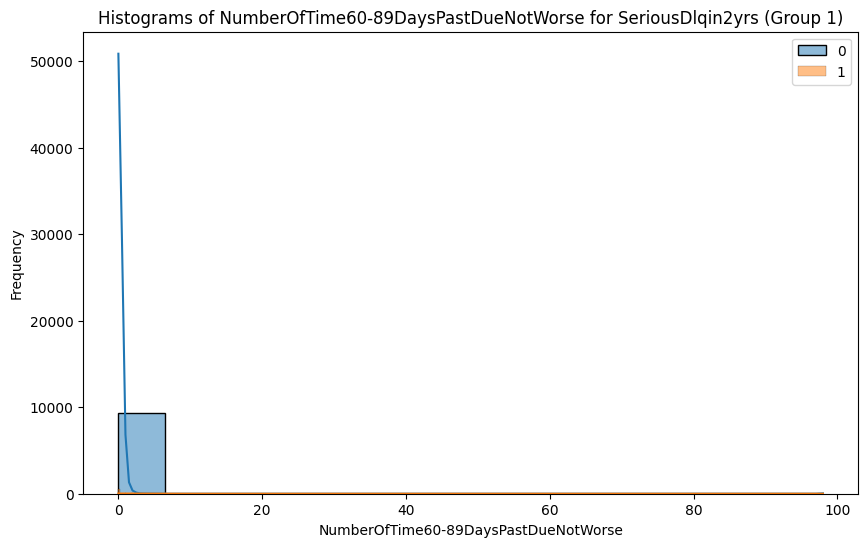

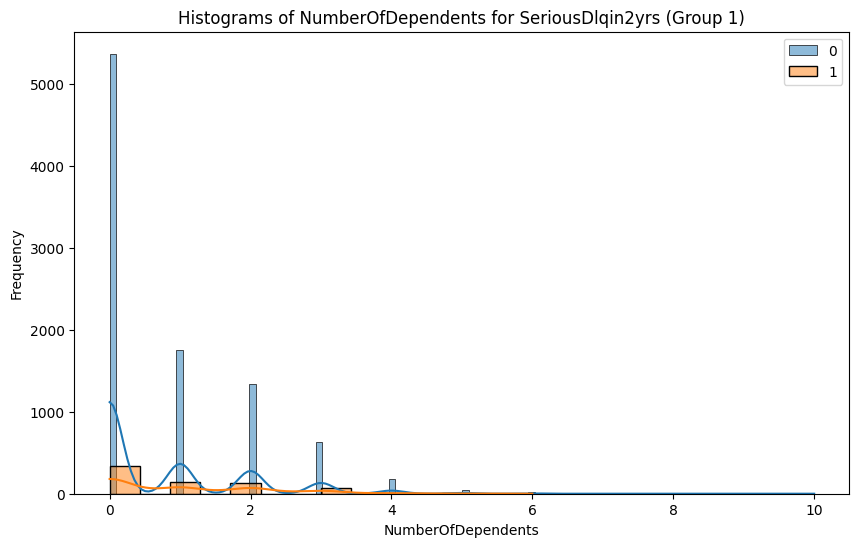

In [ ]:
features = [col for col in train_set.columns if col != target]
for col in features:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

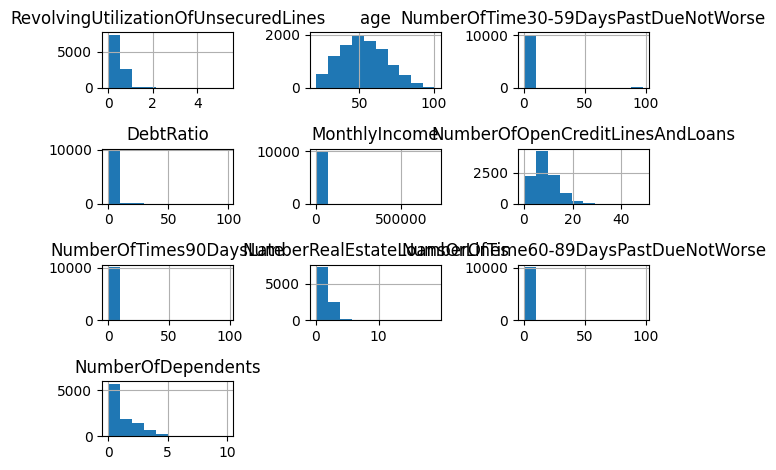

In [20]:
features = [col for col in train_set.columns if col != target]

train_set[features].hist()
plt.tight_layout()

In [21]:
X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

In [ ]:
# Un pipeline cada uno:
# Bastien -> no supervisado
# Genma -> GridsearchCV
# Guillem -> onehotencoder
# Ruben -> supervisado

In [ ]:
# Crear el pipeline
pipeline = ImbPipeline([
    ('undersampling', RandomUnderSampler(random_state=42)),  # Paso de undersampling
    ('clf', RandomForestClassifier(random_state=42))  # Modelo de clasificación
])
# Entrenar el pipeline
pipeline.fit(X_train, y_train)
# Realizar predicciones y evaluar
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))